<div style="border: solid blue 2px; padding: 20px">
    
# Исследование гипотез для увеличения выручки крупного интернет-магазина.

Суть проекта: мы — аналитики крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Нам предстоит их приоритизировать, запустить A/B-тест и проанализировать результаты. 

**Описание данных**

*Данные для первой части:*

Файл /datasets/hypothesis.csv (гипотезы по увеличению выручки интернет-магазина):
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.
Чем больше значение Efforts, тем дороже проверка гипотезы.

*Данные для второй части:*

Файл /datasets/orders.csv (результаты A/B-теста):
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv (результаты A/B-теста):
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

---
    
**Ход исследования**
    
Данные получим из трех файлов: hypothesis.csv, orders.csv и visitors.csv. О качестве датасета информации нет. Перед тем как приступать к цели исследования, нам необходимо изучить данные.
    
Проверим данные на предмет ошибок и оценим их влияние на результаты исследования. В процессе преодобработки данных попробуем исправить все ошибки, которые могут привести к искажению конечного результата. Далее мы приоритизируем гипотезы и выводы на подходящих графиках и приступим к анализу результатов А/В теста и выявлению закономерностей.
    
Таким образом, мое исследование пройдет в следующие этапы:
    
- Загрузка и предобработка данных.
- Приоритизация гипотез с помощью фреймворков ICE и RICE.
- Изучение результатов проведенного А/В теста.
- Построение необходимых для исследования графиков.
- Подсчет статистической значимости.
- Принятие решения по результатам А/В теста.
- Формулирование выводов и рекомендаций.

# Загрузка данных и изучение общей информации

### 1.1. Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.

Импортируем необходимые нам библиотеки для изучения общей информации и предобработки данных.

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 120
import warnings
warnings.filterwarnings('ignore')

Сохраним файлы с данными в датафреймы.

In [7]:
try:
    hyps = pd.read_csv('/datasets/hypothesis.csv')
except:
    hyps = pd.read_csv('C:/Users/etols/Downloads/hypothesis.csv')

In [8]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('C:/Users/etols/Downloads/orders.csv')

In [9]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('C:/Users/etols/Downloads/visitors.csv')

### 1.2. Изучим общую информацию по каждому датафрейму и проведем первичную предобработку данных.

Напишем функцию для проведения первичной предобработки данных для каждого датасета.

In [171]:
def review(data):
    print(data.info())
    print('--------------------')
    display(data.head())
    print('--------------------')
    display(data.describe())
    print('--------------------')
    print(data.isna().sum())
    print('--------------------')
    print('Дубликатов в данных:', data.duplicated().sum())

In [13]:
review(hyps)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None
--------------------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


--------------------


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


--------------------
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
--------------------
Дубликатов в данных: 0


Сразу видим, что названия столбцов в датафрейме hyps указаны с большой буквы, приведем их к нижнему регистру.

In [15]:
hyps.columns = [x.lower().replace(' ', '_') for x in hyps.columns.values]
hyps.sample()

,hypothesis,reach,impact,confidence,efforts
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [16]:
review(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
--------------------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


--------------------


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


--------------------
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
--------------------
Дубликатов в данных: 0


In [17]:
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
orders.sample()

,transaction_id,visitor_id,date,revenue,group
34,2153010762,834683205,2019-08-15,22785,A


In [18]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print(orders['date'].dtypes)

datetime64[ns]


In [19]:
group_a_visitors = orders[orders['group'] == 'A']['visitor_id'].unique()
group_b_visitors = orders[orders['group'] == 'B']['visitor_id'].unique()

common_users = np.intersect1d(group_a_visitors, group_b_visitors)

proportion = len(common_users) / orders['visitor_id'].nunique()

print('Всего пользователей в тесте:', orders['visitor_id'].nunique())
print(f"Доля пользователей, оказавшихся одновременно в двух группах: {proportion:.2%}")

Всего пользователей в тесте: 1031
Доля пользователей, оказавшихся одновременно в двух группах: 5.63%


In [20]:
#orders = orders.query('visitor_id not in @common_users')
#print('Всего пользователей в тесте осталось:', orders['visitor_id'].nunique())

In [21]:
review(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
--------------------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


--------------------


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


--------------------
date        0
group       0
visitors    0
dtype: int64
--------------------
Дубликатов в данных: 0


In [22]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print(visitors['date'].dtypes)

datetime64[ns]


***ВЫВОДЫ:***

1. Мы загрузили необходимые нам данные и сохранили их в датафреймы.
2. В ходе предобработки данных мы выяснили, что пропусков и дубликатов в данных нет.
3. Столбцы с датами были приведены к нужному типу данных: тип `object` мы привели к типу `datetime`.
4. Мы выяснили, что в таблице `orders` есть пользователи, оказавшиеся в двух группах, доля таких пользователей составила 5,63 %.

# Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [26]:
hyps

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### 1.1. Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

Фреймворк ICE будем рассчитывать по следующей формуле:
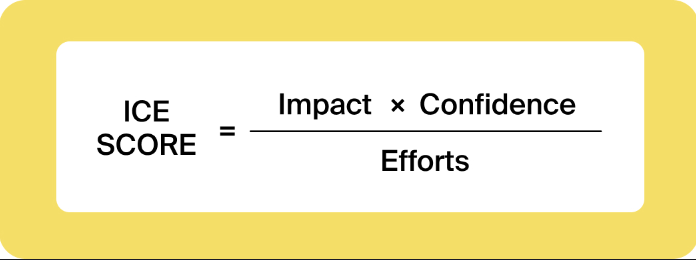

In [29]:
hyps['ICE'] = hyps['impact'] * hyps['confidence'] / hyps['efforts']
display(round(hyps[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)), 1)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


1

***Наиболее перспективные гипотезы по фреймворку ICE - это следующие гипотезы:***

- гипотеза 9 (Запустить акцию, дающую скидку на товар в день рождения)
- гипотеза 1 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей)
- гипотеза 8 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)
- гипотеза 7 (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию)

### 1.2. Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

Фреймворк RICE будем рассчитывать по следующей формуле:
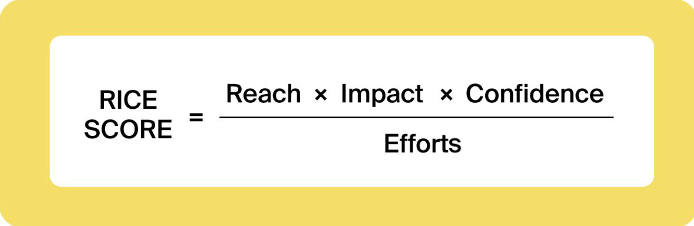

In [33]:
hyps['RICE'] = hyps['reach'] * hyps['impact'] * hyps['confidence'] / hyps['efforts']
display(hyps[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


***Наиболее перспективные гипотезы по фреймворку RICE - это следующие гипотезы:***

- гипотеза 8 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)
- гипотеза 3 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа)
- гипотеза 1 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей)
- гипотеза 7 (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию)

### 1.3. Что изменилось в приоритизации гипотез при применении RICE вместо ICE?

При применении второго фреймворка приоритизация гипотез изменилась - в первом случае, гипотеза 9 была на первом месте, во втором - ее нет даже в первой четверке, также приоритетные гипотезы 8, 1 и 7 находятся в обоих случаях в топ-4. Однако приоритеты распределены по-другому. Гипотеза 3 в первом случае была ниже. 

Во втором случае на первом месте гипотеза 8, так получилось, потому что ее параметр `Reach` (скольких пользователей затронет изменение, которое вы хотите внести) равен максимальному значению, 10, в то время, как у других гипотез он меньше. Кроме силы гипотез обязательно нужно учитывать и то, как много пользователей она затронет.

***ВЫВОД:***

Фреймфорк RICE добавил критерий охвата `Reach`, что сместило приоритеты в сторону гипотез, которые влияют на большее количество пользователей (например, форма подписки и блоки рекомендаций).
Гипотезы с ограниченным охватом (например, скидка в день рождения, гипотеза 9) потеряли в приоритете.

# Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

### 1.1. Построим график кумулятивной выручки по группам и сделаем первые выводы.

Создадим массив уникальных пар значений дат и групп теста методом `drop_duplicates()`:

In [42]:
datesGroups = orders[['date','group']].drop_duplicates()

Получаем агрегированные кумулятивные по дням данные о заказах, о посетителях интернет-магазина и объединим данные в одной таблице:

In [44]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] \
                                     .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
                                     .sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])] \
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1) \
                                       .sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Создадим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах:

In [46]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим график кумулятивной выручки по группам:

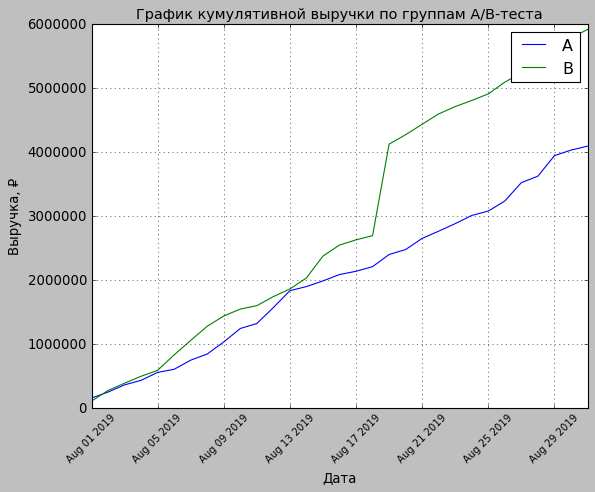

In [48]:
import matplotlib.pyplot as plt
plt.style.use('classic')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам A/B-теста', fontsize=13)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка, ₽', fontsize=12)
plt.xticks(rotation = 45, fontsize=9)
plt.grid()
plt.legend() 
plt.show()

***Практически в течение всего теста выручка увеличивается равномерно, однако не можем не обратить внимание на резкий скачок в одной точке графика группы В. Это может говорить либо о резком увеличении количества заказов в определенный момент времени, либо о появлении более дорогих заказов. Данные выбросы нужно будет обязательно проанализировать далее.***

### 1.2. Построим график кумулятивного среднего чека по группам и сделаем первые выводы.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

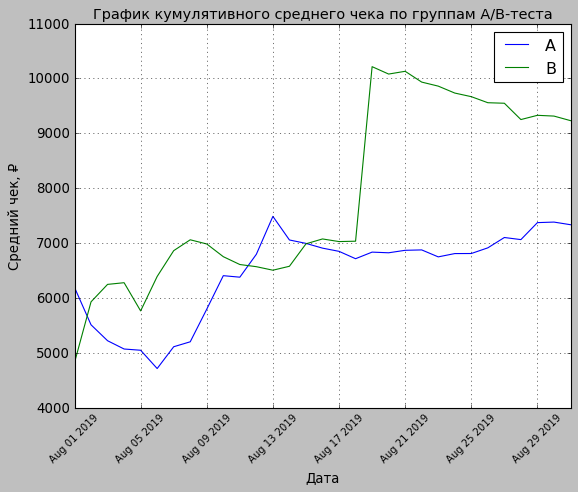

In [52]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам A/B-теста', fontsize=13)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек, ₽', fontsize=12)
plt.xticks(rotation = 45, fontsize=9)
plt.grid()
plt.legend() 
plt.show()

***Значения среднего чека двух групп разные. Средний чек группы А сначала упал вниз, затем был скачок вверх, однако после этого ситуация практически стабилизировалась. Средний чек группы В рос умеренно, затем резко скакнул вверх, после этого заметна тенденция к умеренному снижению среднего чека.***

### 1.3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A и сделаем выводы.

Построим график относительного различия для среднего чека, добавим горизонтальную ось методом `axhline()`, сразу объединим данные двух групп в один датафрейм:

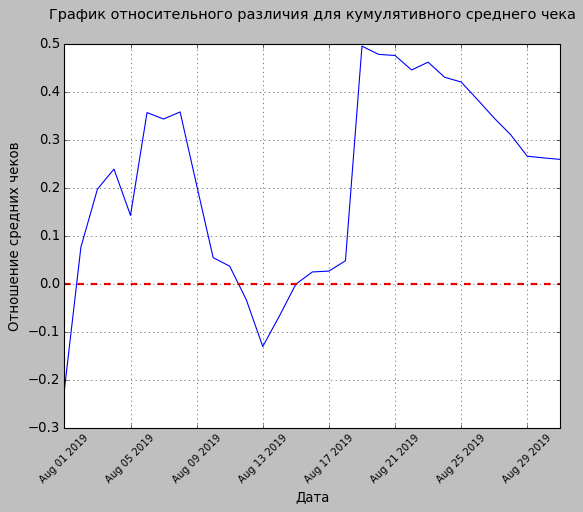

In [175]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB']/
    mergedCumulativeRevenue['ordersB'])/
    (mergedCumulativeRevenue['revenueA']/
    mergedCumulativeRevenue['ordersA'])-1
)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.title('График относительного различия для кумулятивного среднего чека', fontsize=13, y=1.05)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12)
plt.xticks(rotation = 45, fontsize=9)
plt.grid()

plt.show()

***График неравномерный, видны точки как резких скачков, так и резких падений, что говорит о том, что где-то в данных точно есть крупные заказы и выбросы.***

### 1.4. Построим график кумулятивного среднего количества заказов на посетителя по группам и сделаем выводы.

Считаем конверсию и разделим данные на группы:

In [60]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Зададим масштаб осей методом `plt.axis()`. Передадим ему минимальное и максимальное значения оси `x`; минимальное и максимальное значения оси `y` —  `["2019-08-01", '2019-08-29', 0, 0.015]`:

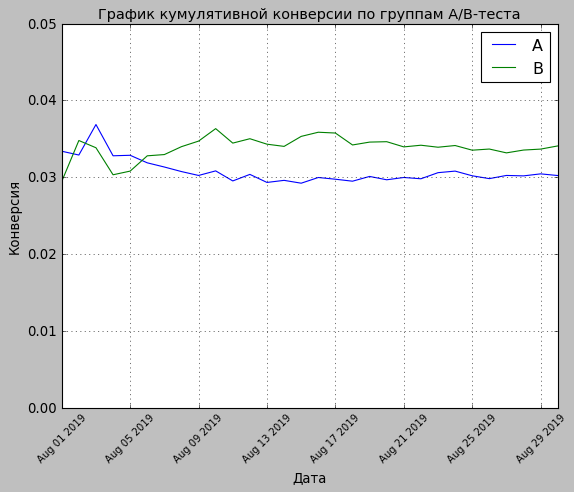

In [62]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 30), 0, 0.05])

plt.title('График кумулятивной конверсии по группам A/B-теста', fontsize=13)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.xticks(rotation = 45, fontsize=9)
plt.grid()
plt.legend() 

plt.show()

***В начале теста группа А имела несколько большее значение конверсии, чем группа В. Затем в определенный момент значение в группе А снизилось и далее стабилизировалось на уровне этого значения, а конверсия в группе В возросла и далее стабилизировалась на уровне этого более высокого значения.***

### 1.5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A и сделаем выводы.

Объединим таблицы `cumulativeDataA` и `cumulativeDataB` методом `merge()` и сохраним в переменной `mergedCumulativeConversions`:

In [66]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']] \
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Далее построим необходимый график:

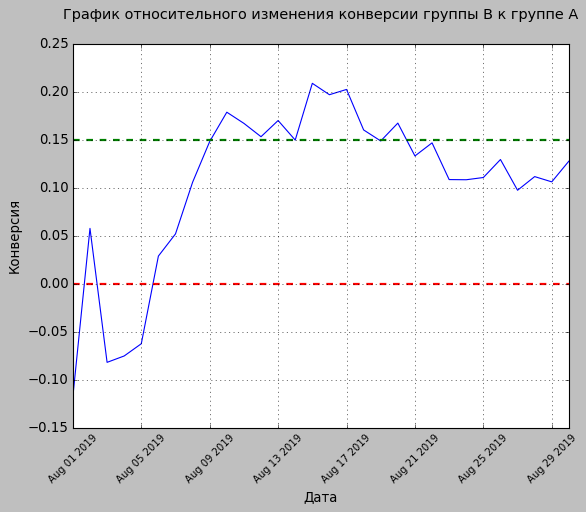

In [177]:
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1 
   )

plt.title("График относительного изменения конверсии группы B к группе A", fontsize=13, y=1.05)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.xticks(rotation = 45, fontsize=9)
plt.grid()

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.axhline(y=0.15, color='green', linestyle='--', linewidth=2)

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 30), -0.15, 0.25])

plt.show()

***В начале теста группа В лидировала, затем резко стала проигрывать группе А, но затем начала наращивать темп и примерно зафиксировалась на значении конверсии в 12%-13% относительно группы А.***

### 1.6. Построим точечный график количества заказов по пользователям и сделаем выводы.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [72]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


***Есть несколько пользователей, которые сделали больше, чем в среднем пользователь за неделю, это пользователи с 11, 9 и 8 заказами.***

Построим гистрограмму распределения количества заказов на одного пользователя:

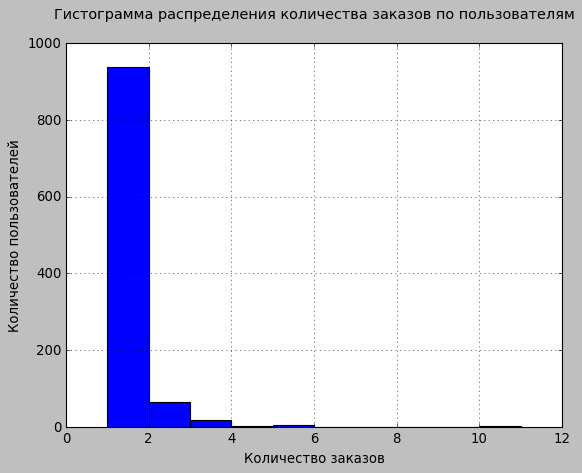

In [179]:
plt.hist(ordersByUsers['orders'])

plt.title('Гистограмма распределения количества заказов по пользователям', fontsize=13, y=1.05)
plt.xlabel('Количество заказов', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid()

plt.show()

***Как мы видим, большинство пользователей сделало только один заказ, достаточно много пользователей сделало 2 или 3 заказа, но также есть и пользователи, которые сделали 10 и 11 заказов.***

Построим точечный график числа заказов на одного пользователя:

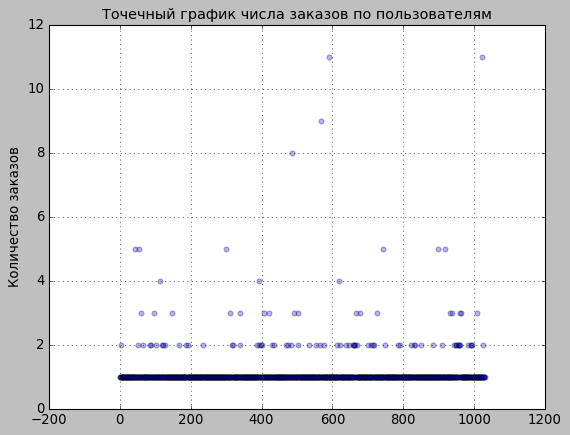

In [78]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'], alpha=0.3)

plt.title('Точечный график числа заказов по пользователям', fontsize=13)
plt.ylabel('Количество заказов', fontsize=12)
plt.grid()

plt.show()

***Выводы подтвердились: много пользователей с 2-3 заказами. Пока непонятно, считать их аномалиями или нет.***

### 1.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [81]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


***Не более 5% пользователей оформляли больше, чем 2 заказа, и не более 1% пользователей оформляли более, чем 4 заказа. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.***

### 1.8. Построим точечный график стоимостей заказов и сделаем выводы.

Посмотрим на топ-10 самых дорогих по стоимости заказов:

In [85]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Построим точечный график стоимостей заказов:

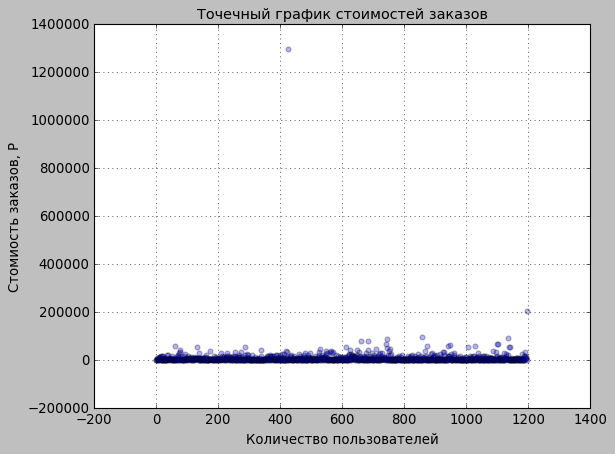

In [87]:
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue'], alpha=0.3)

plt.title('Точечный график стоимостей заказов', fontsize=13)
plt.xlabel('Количество пользователей', fontsize=12)
plt.ylabel('Стомиость заказов, Р', fontsize=12)

plt.grid()
plt.show()

Попробуем немного изменить диапазон значений по оси y, поскольку по данному графику мало что можно понять:

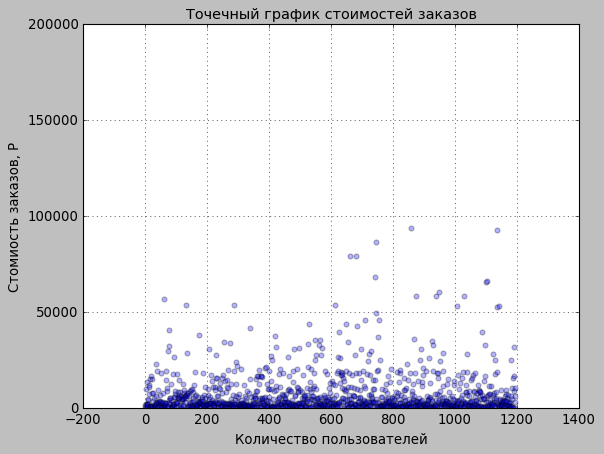

In [89]:
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue'], alpha=0.3)

plt.title('Точечный график стоимостей заказов', fontsize=13)
plt.xlabel('Количество пользователей', fontsize=12)
plt.ylabel('Стомиость заказов, Р', fontsize=12)

plt.ylim(0, 200000)

plt.grid()
plt.show()

***Большинство заказов находится в пределах 30 000 р, их можно было бы принять за аномальную границу стоимости заказов, однако мы не знаем долю этих заказов от общего количества.***

### 1.9. Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов.

In [92]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


***Получается, что не более 5% заказов стоимостью дороже 28 000 рублей, и не более 1% заказов дороже 58 233 рублей. Можно выбрать 28 000 р за верхнюю границу стоимости заказов, и отсеять аномальные значения стоимости по ней.***

### 1.10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным и сделаем выводы.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы:

**H₀**: различий в среднем количестве заказов между группами нет.

**H₁**: различия в среднем между группами есть.

Для расчета статистической значимости различий в среднем количестве заказов между группами нам необходимо подготовить имеющиеся данные.

Нам нужны следующие столбцы:

- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [98]:
import scipy.stats as stats

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Cоздадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['visitor_id', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [100]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Так мы подготовим выборки к проверке критерием Манна-Уитни.

In [102]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(
                         data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                     ), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(
                         data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
                     ), name='orders')],axis=0)

Применим критерий и отформатируем _p-value_, округлив его до трёх знаков после запятой.

In [104]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Статистическая значимость различий между группами по "сырым" данным', '{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Статистическая значимость различий между группами по "сырым" данным 0.138


***_P-value_ меньше 0.05. Значит, нулевую гипотезу, что различий в среднем количестве заказов между группами по "сырым" данным нет, можно отвергнуть. Среднее количество заказов группы B получилось больше среднего количества заказов группы A.***

### 1.11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным и сделаем выводы.

Сформулируем гипотезы:

**H₀**: различий в среднем чеке между группами нет.

**H₁**: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию `mannwhitneyu()` данные о выручке с заказов.

А ещё найдём относительные различия в среднем чеке между группами:

In [108]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'])[1]))
print('Статистическая значимость различия в среднем чеке между группами по "сырым" данным', '{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/
    orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Статистическая значимость различия в среднем чеке между группами по "сырым" данным 0.259


***P-value значительно больше 0.05. Значит, нулевую гипотезу, что различий в среднем чеке между группами по "сырым" данным нет, отвергать нет оснований. Средний чек заказов группы B получился больше среднего чека заказов группы A.***

### 1.12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным и сделаем выводы.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.

Узнаем, сколько всего аномальных пользователей атрибутом `shape`.

In [112]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print("Количество аномальных пользователей:", abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
Количество аномальных пользователей: 74


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [114]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [116]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Статистическая значимость различий между группами по "очищенным" данным', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
Статистическая значимость различий между группами по "очищенным" данным 0.173


***P-value меньше 0.05. Значит, нулевую гипотезу, что различий в среднем количестве заказов между группами по "очищенным" данным нет, можно отвергнуть. Среднее количество заказов группы B получилось больше среднего количества заказов группы A.***

***P-value по "сырым" данным составлял 0,017, по "очищенным" данным - 0,013, статистическая значимость различий между группами А и В по "сырым" данным составляла 0,138, по "очищенным" данным - 0,173. Можем сделать вывод, что сильных различий между результатами по "сырым" и "очищенным" данным нет.***

### 1.13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным и сделаем выводы.

Посмотрим, как обстоят дела с различиями в среднем чеке между группыми по "очищенным" данным:

In [121]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Статистическая значимость различия в среднем чеке между группами по "сырым" данным', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.738
Статистическая значимость различия в среднем чеке между группами по "сырым" данным -0.020


***P-value значительно больше 0.05. Значит, нулевую гипотезу, что различий в среднем количестве заказов между группами по "очищенным" данным нет, отвергнуть не можем. Средний чек заказов группы B получился сильно меньше среднего чека заказов группы A.***

***P-value по "сырым" данным составлял 0,729, по "очищенным" данным - 0,738, здесь результаты не сильно различаются.***

***Однако если статистическая значимость различий в среднем чеке между группами А и В по "сырым" данным составляла 0.259, и средний чек группы В был больше среднего чека группы А, то по "очищенным" данным все наоборот, значение отрицательное - -0.020. То есть по "очищенным" данным средний чек группы В меньше среднего чека группы А.***

# Общие выводы

***Загрузка и предобработка данных:***

В ходе предобработки данных мы изучили имеющиеся в нашем распоряжении данные, дубликатов и пропусков в данных нет. Столбцы с датами в двух датасетах мы приведи к корректному типу данных - `datetime`.

***Приоритизация гипотез:***

Мы использовали два фреймворка `ICE` и `RICE` для того, чтобы приоритизировать гипотезы, исследовали разницу двух полученных результатов, и выявили наиболее важные гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (гипотеза 8)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (гипотеза 1)
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (гипотеза 7)

***Изучение результатов проведенного А/В теста:***

1. Построив график кумулятивной выручки по группам, мы обратили внимание, что практически в течение всего теста выручка увеличивается равномерно, кроме резкого скачка в одной точке графика группы В, резкое увеличение количества заказов в определенный момент времени, лио резкое увеличение стоимости заказов.
2. График кумулятивного среднего чека показал, что средний чек группы В по сравнению с группой А рос умеренно, резко скакнул вверх, однако после этого наметилась тенденция к умеренному снижению среднего чека.
3. В начале теста группа А имела несколько большее значение среднего количества заказов на посетителя, чем группа В. Затем в определенный момент значение в группе А снизилось и стабилизировалось, а конверсия в группе В возросла и далее стабилизировалась на уровне этого более высокого значения.
4. График относительного изменения кумулятивного среднего количества заказов на посетителя показал, что группа В после некоторого спада в начале теста начала наращивать темп и примерно зафиксировалась на значении конверсии в 12%-13% относительно группы А.
5. Мы исследовали доли большого количества заказов на одного пользователя, в итоге получилось, что не более 5% пользователей оформляли больше, чем 2 заказа, и не более 1% пользователей оформляли более, чем 4 заказа.
6. Мы изучили долю дорогих заказов, в итоге мы выявили, что стоимость не более 5% заказов дороже 28 000 рублей, и стоимость не более 1% заказов дороже 58 233 рублей.
7. Есть статистически значимое различие по конверсии между группами как по "сырым" данным, так и после фильтрации аномалий, значения статистической значимости по "сырым" данным составляла 0,138, по "очищенным" данным - 0,173. 
8. По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть. Значения различий в среднем чеке между группами А и В по "сырым" данным составляла 0.259, и средний чек группы В был больше среднего чека группы А, то по "очищенным" данным все наоборот, значение отрицательное - -0.020. То есть по "очищенным" данным средний чек группы А больше среднего чека группы В.

***ВЫВОД:***
В принципе, группа В показала значения лучше группы А, соответственно по результатам проверки среднее количество заказов в группе В увеличилось при отсутствии значимых изменений в среднем чеке. Поэтому **тест можно остановить и признать успешным**, поскольку наша цель была - проверить увеличение выручки. Увеличение выручки при таких условиях произошло.